In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Load the data
data = pd.read_csv("data/ryanair_reviews.csv")
comments = data[["Comment title", "Comment"]]
comments.head()

,Comment title,Comment
0,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...
1,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...
2,“Really impressed!”,"Really impressed! You get what you pay for, th..."
3,“a decent offering from Ryanair”,I should like to review my flight from Faro to...
4,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w..."


**Preprocessing: (Optional)**
No preprocessing is necessary as it is done by VADER.

Source: [An Introduction to VADER](https://towardsdatascience.com/an-short-introduction-to-vader-3f3860208d53)

Other sources:
- [British Airways Sentiment Analysis Notebook](https://github.com/Horace-code/British-Airways-Sentiment-Analysis/blob/main/British_Airways_Sentiment_Analysis.ipynb)
- [Sentiment Analysis using VADER](https://akladyous.medium.com/sentiment-analysis-using-vader-c56bcffe6f24)


In [26]:
def remove_punctuation(one_comment):
    punc = '!()-[]{};:"\,<>./?@#$%^&*_~'
    # Use a list comprehension to create a new string without punctuation
    no_punc = ''.join(char for char in one_comment if char not in punc)
    return no_punc

# Function to remove stopwords and non-alphabetic tokens
def remove_stopwords_and_non_alphabetic_tokens(one_comment):
    # Tokenize the comment
    tokenized_words = word_tokenize(one_comment.lower())
    # Remove the stopwords and non-alphabetic tokens
    stopwords = nltk.corpus.stopwords.words('english')
    no_stop = [word for word in tokenized_words if word.lower() not in stopwords and word.isalpha()]
    return ' '.join(no_stop)


In [30]:
sia = SentimentIntensityAnalyzer()

In [31]:
# Add sentiment scores to the data frame
comments["score"] = comments["Comment"].apply(lambda x: sia.polarity_scores(x))
comments['negative'] = comments['score'].apply(lambda x: x['neg'])
comments['neutral'] = comments['score'].apply(lambda x: x['neu'])
comments['positive'] = comments['score'].apply(lambda x: x['pos'])
comments['compound'] = comments['score'].apply(lambda x: x['compound'])
comments.drop(columns=["score"], inplace=True)

In [33]:
# Define the function for the emotion (positive, negative, neutral)
def final_sentiment(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [34]:
comments["sentiment"] = comments["compound"].apply(lambda compound : final_sentiment(compound))

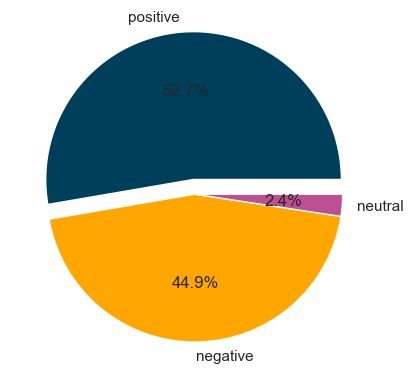

In [35]:
# Compute the distribution percentages for each sentiment
sentiment_proportions = comments['sentiment'].value_counts(normalize=True) * 100

# Generate a pie chart to visualize the distribution
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.pie(
    sentiment_proportions,
    labels= sentiment_proportions.index,
    colors=['#003f5c', '#ffa600', '#bc5090'],
    explode=[0.1, 0 , 0],
    autopct='%1.1f%%'
    )

plt.show()

Among a total of over 2000 reviews, approximately 52.7% exhibited a positive sentiment, around 44.9% were characterized as negative, and merely 2.4% were identified as neutral. Consequently, the prevailing trend in these reviews is one of polarization, with the majority leaning towards either a positive or negative sentiment. Though, it depends on the intervals set in the `final_sentiment(compound)` function.

**Text Analysis and Visualisation**

In [36]:
def get_wordcloud_and_hist_of_words(cleaned_column):

    # Combine all reviews into a single string
    joined_reviews = ''.join(cleaned_column)
    tokenized_words = word_tokenize(joined_reviews)

    # Create a Counter to count word frequencies
    word_freq = Counter(tokenized_words)

    # Get the most common words and their frequencies
    common_words = word_freq.most_common(30)

    # Get the labels and values for the histogram
    labels, values = zip(*common_words)

    # Create the histogram
    plt.bar(labels, values)

    # Set the x-axis labels to be vertical
    plt.xticks(rotation=90)

    # Set labels
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency')
    plt.show()

    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


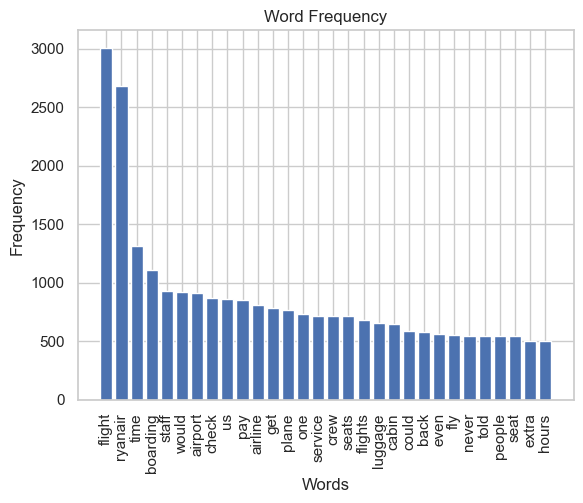

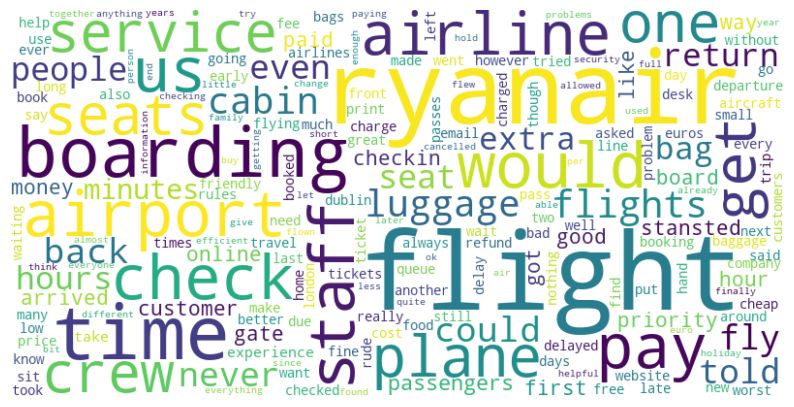

In [37]:
# Preprocess the comments
comments["Comment"] = comments["Comment"].apply(lambda x: remove_punctuation(x))
comments["Comment"] = comments["Comment"].apply(lambda x: remove_stopwords_and_non_alphabetic_tokens(x))

get_wordcloud_and_hist_of_words(comments["Comment"])